In [3]:
import sys
sys.path.append('..')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_loader import load_processed_data

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

Configuration loaded
Root directory: \\wsl.localhost\UbuntuNew\home\matheus\Medical-rag-system\notebooks\..
Dataset will be saved in: \\wsl.localhost\UbuntuNew\home\matheus\Medical-rag-system\notebooks\..\data\raw


In [4]:
df = load_processed_data()
print(f"Total de registros: {len(df)}")
print(f"\nColunas: {df.columns.tolist()}")

Loading data from \\wsl.localhost\UbuntuNew\home\matheus\Medical-rag-system\notebooks\..\data\processed\medquad_clean.csv...
Loaded 16407 records
Total de registros: 16407

Colunas: ['question', 'answer', 'source', 'url', 'doc_id', 'id']


In [5]:
df.head()

,question,answer,source,url,doc_id,id
0,What are the symptoms of Hereditary congenital...,What are the signs and symptoms of Hereditary ...,GARD,https://rarediseases.info.nih.gov/gard/8583/he...,1,0
1,What is (are) Punctate inner choroidopathy ?,Punctate inner choroidopathy (PIC) is an infla...,GARD,https://rarediseases.info.nih.gov/gard/7503/pu...,1,1
2,What are the symptoms of Hirschsprung disease ...,What are the signs and symptoms of Hirschsprun...,GARD,https://rarediseases.info.nih.gov/gard/2699/hi...,1,2
3,What are the symptoms of Madokoro Ohdo Sonoda ...,What are the signs and symptoms of Madokoro Oh...,GARD,https://rarediseases.info.nih.gov/gard/3348/ma...,1,3
4,"What are the symptoms of Cataracts, ataxia, sh...","What are the signs and symptoms of Cataracts, ...",GARD,https://rarediseases.info.nih.gov/gard/10222/c...,1,4


In [6]:
print("Estatisticas do db:\n")
print(f"Total de perguntas: {len(df)}")
print(f"Fontes unicas: {df['source'].nunique()}")
print(f"\nTamanho medio das respostas: {df['answer'].str.len().mean():.0f} caracteres")
print(f"Tamanho medio das perguntas: {df['question'].str.len().mean():.0f} caracteres")

Estatisticas do db:

Total de perguntas: 16407
Fontes unicas: 9

Tamanho medio das respostas: 1303 caracteres
Tamanho medio das perguntas: 51 caracteres


C:\Users\Ligia\AppData\Local\Temp\ipykernel_15988\1761036592.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.values, y=source_counts.index, palette='viridis')


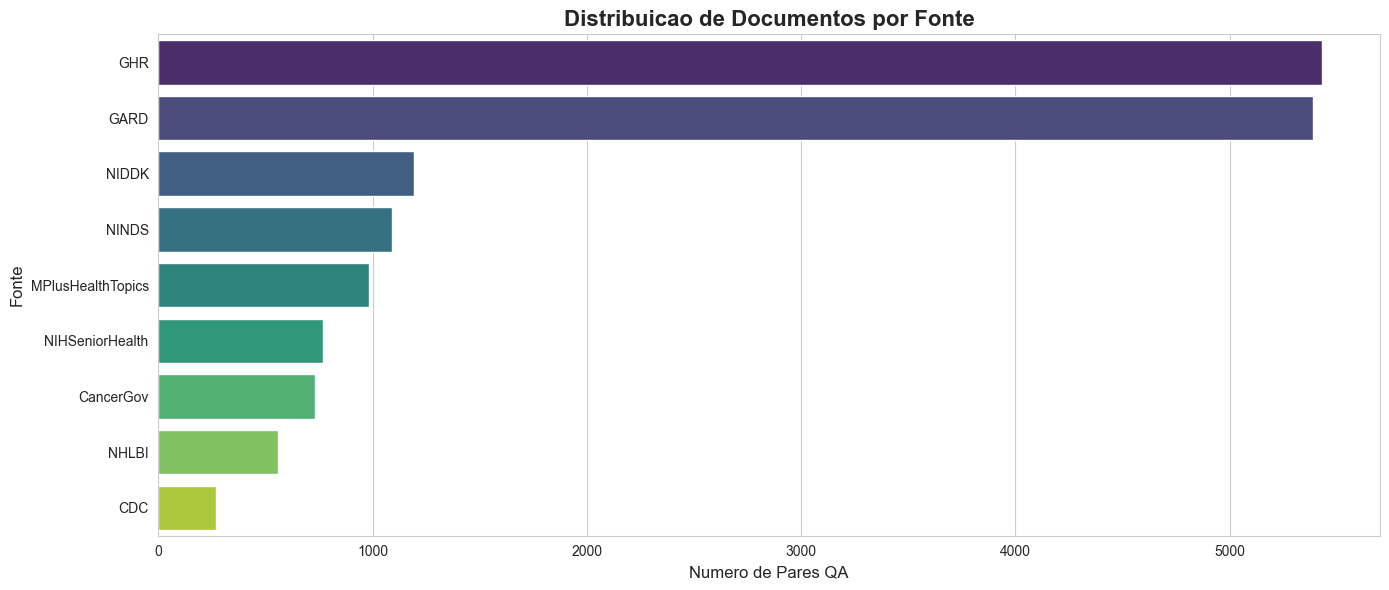


Top 5 Fontes:
source
GHR                  5430
GARD                 5389
NIDDK                1192
NINDS                1088
MPlusHealthTopics     981
Name: count, dtype: int64


In [7]:
plt.figure(figsize=(14, 6))
source_counts = df['source'].value_counts()
sns.barplot(x=source_counts.values, y=source_counts.index, palette='viridis')
plt.title('Distribuicao de Documentos por Fonte', fontsize=16, fontweight='bold')
plt.xlabel('Numero de Pares QA', fontsize=12)
plt.ylabel('Fonte', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nTop 5 Fontes:")
print(source_counts.head())

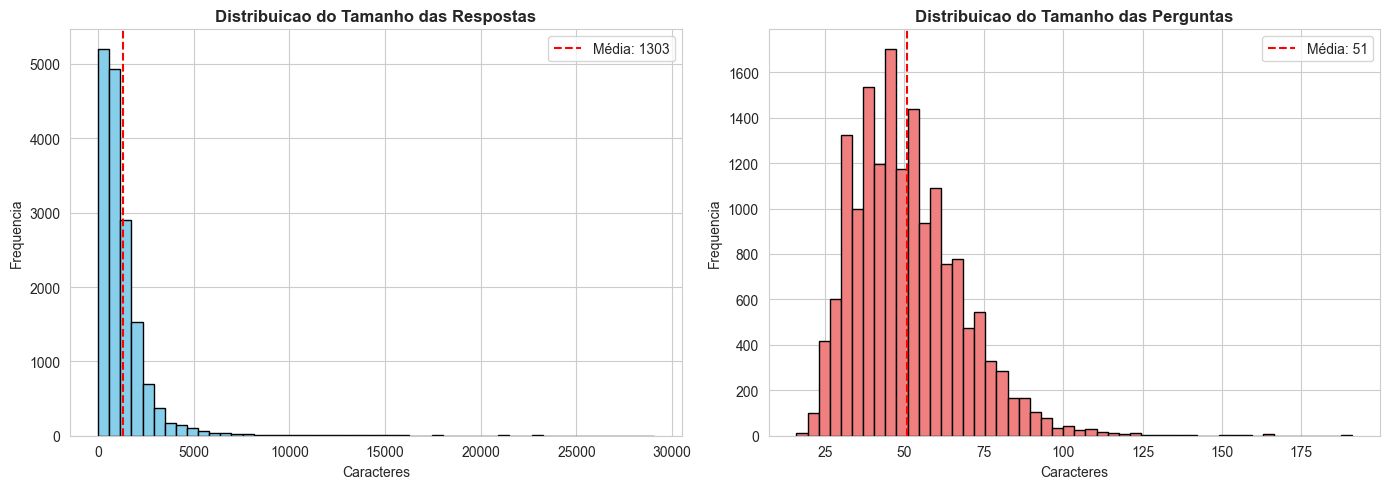

In [8]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
df['answer_length'] = df['answer'].str.len()
plt.hist(df['answer_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuicao do Tamanho das Respostas', fontweight='bold')
plt.xlabel('Caracteres')
plt.ylabel('Frequencia')
plt.axvline(df['answer_length'].mean(), color='red', linestyle='--', label=f'Média: {df["answer_length"].mean():.0f}')
plt.legend()

plt.subplot(1, 2, 2)
df['question_length'] = df['question'].str.len()
plt.hist(df['question_length'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribuicao do Tamanho das Perguntas', fontweight='bold')
plt.xlabel('Caracteres')
plt.ylabel('Frequencia')
plt.axvline(df['question_length'].mean(), color='red', linestyle='--', label=f'Média: {df["question_length"].mean():.0f}')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
print("🔍 Exemplos de Perguntas e Respostas:\n")

for source in df['source'].unique()[:3]:  # 3 primeiras fontes
    print(f"\n{'='*80}")
    print(f"Fonte: {source}")
    print('='*80)
    
    sample = df[df['source'] == source].sample(1).iloc[0]
    
    print(f"\nPergunta: {sample['question']}")
    print(f"\nResposta: {sample['answer'][:300]}...")

🔍 Exemplos de Perguntas e Respostas:


Fonte: GARD

Pergunta: What are the treatments for Nonspherocytic hemolytic anemia due to hexokinase deficiency ?

Resposta: How might nonspherocytic hemolytic anemia due to hexokinase deficiency be treated? When severe anemia is present, blood transfusions may be necessary. Affected individuals should avoid any drugs that can cause destruction of red blood cells, as well as any environmental triggers that may be identifi...

Fonte: NIDDK

Pergunta: How to diagnose Nephrotic Syndrome in Adults ?

Resposta: Urine samples are taken to diagnose people suspected of having nephrotic syndrome.
                
Nephrotic syndrome is diagnosed when large amounts of protein are found in the urine. The blood protein albumin makes up much of the protein that is lost, though many other important proteins are also...

Fonte: MPlusHealthTopics

Pergunta: Do you have information about Club Drugs

Resposta: Summary : Club drugs are group of psychoactive drugs. Th

In [10]:
from collections import Counter
import re

def get_top_words(texts, n=20):
    all_text = ' '.join(texts).lower()
    all_text = re.sub(r'[^a-z\s]', '', all_text)
    words = all_text.split()
    stopwords = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 
                 'of', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'what', 'how',
                 'do', 'does', 'can', 'could', 'should', 'would', 'i', 'you', 'it', 'they'}
    words = [w for w in words if w not in stopwords and len(w) > 3]
    
    return Counter(words).most_common(n)

top_words = get_top_words(df['question'])

print("Top 20 Palavras nas Perguntas:\n")
for word, count in top_words:
    print(f"{word:.<20} {count:>5}")

Top 20 Palavras nas Perguntas:

syndrome............  3616
symptoms............  2748
treatments..........  2437
inherited...........  1459
disease.............  1443
people..............  1132
many................  1117
affected............  1117
genetic.............  1097
related.............  1088
changes.............  1088
type................   899
deficiency..........   861
causes..............   755
diagnose............   649
cancer..............   554
with................   526
about...............   448
research............   396
done................   396


In [11]:
stats = {
    'total_qa_pairs': len(df),
    'unique_sources': df['source'].nunique(),
    'avg_answer_length': df['answer_length'].mean(),
    'avg_question_length': df['question_length'].mean(),
    'median_answer_length': df['answer_length'].median(),
    'top_source': df['source'].value_counts().index[0]
}

print("\nResumo Estatistico:")
for key, value in stats.items():
    print(f"  • {key}: {value}")


Resumo Estatistico:
  • total_qa_pairs: 16407
  • unique_sources: 9
  • avg_answer_length: 1303.4523069421589
  • avg_question_length: 50.684951545072224
  • median_answer_length: 890.0
  • top_source: GHR
